# Load Data

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray

In [6]:
import os
 
# Get the list of all files and directories
path = "./content/slides_level1"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# # prints all files
# print(dir_list)

Files and directories in ' ./content/slides_level1 ' :


In [42]:
def display_windows(images, row, col, x, y):
  fig = plt.figure(figsize=(x,y))
  shuffle = np.arange(len(images))
  np.random.shuffle(shuffle)
  for i in range(row):
    for j in range(col):
      idx = i*row+j
      ax = fig.add_subplot(col, row, idx+1)
      plt.imshow(images[shuffle[idx]])
      ax.axes.get_xaxis().set_visible(False)
      ax.axes.get_yaxis().set_visible(False)

In [8]:
#pos & neg 
# load level 5 data
pos_images = []
neg_images = []


for file_name in dir_list:
    if file_name[-5] == 'g':
        file_path = os.path.join(path, file_name)
        neg_images.append(np.load(file_path))
    else:
        pos_images.append(np.load(file_path))
        


In [9]:
print(len(pos_images))
print(len(neg_images))

3863
3863


In [13]:
pos_images = np.array(pos_images)
neg_images = np.array(neg_images)

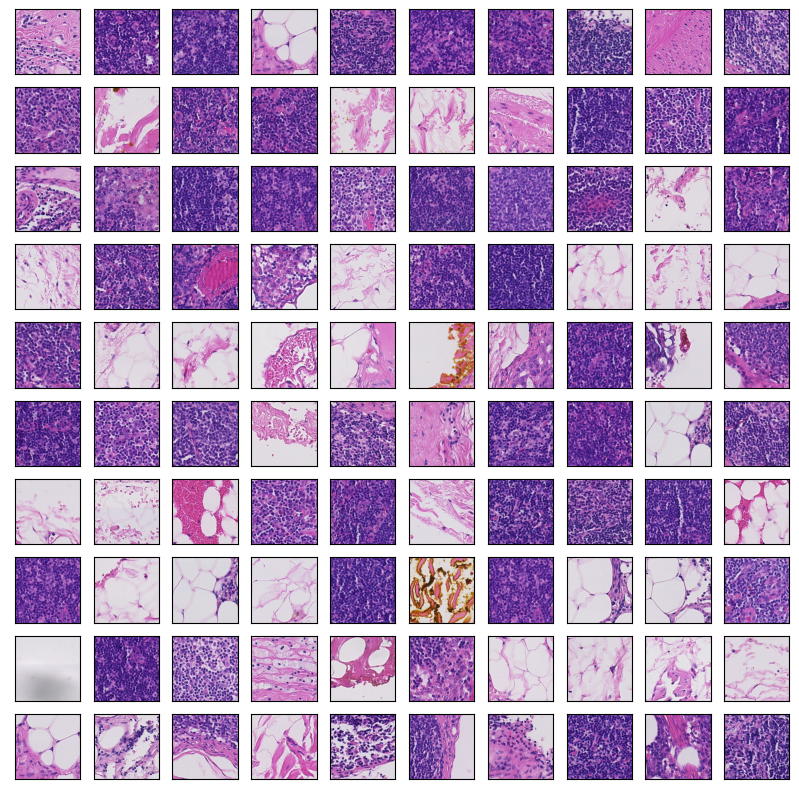

In [46]:
display_windows(pos_images, 10, 10, 10, 10)

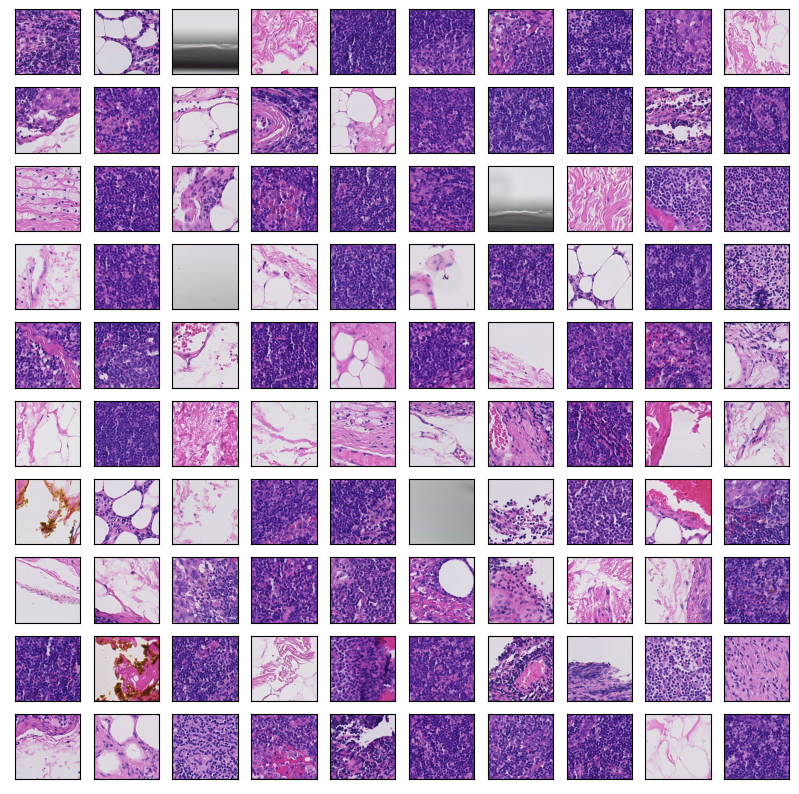

In [45]:
display_windows(neg_images, 10, 10, 10, 10)

In [ ]:
#shuffle pos & neg images
label_pos = np.ones(len(pos_images))
label_neg = np.zeros(len(neg_images))
assert len(pos_images)==len(neg_images)

images = np.concatenate((pos_images + neg_images), axis=0)
labels = np.concatenate((label_pos, label_neg))
shuffle = np.arange(len(labels))
np.random.shuffle(shuffle)

ds_images = [images[i] for i in shuffle]
ds_labels = [labels[i] for i in shuffle]

In [24]:
type(ds_images)

list

# 8:2 Train & Test Split & save to npy file

In [ ]:
# # train test split 80:20
# train_window = np.array(ds_images[:len(ds_labels)//10*8])
# train_label = np.array(ds_labels[:len(ds_labels)//10*8])

# test_window = np.array(ds_images[len(ds_labels)//10*8:])
# test_label = np.array(ds_labels[len(ds_labels)//10*8:])

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(ds_images), np.array(ds_labels), test_size=0.2)

In [26]:
with open('train.npy', 'wb') as f:
    np.save(f, X_train)
    np.save(f, y_train)

In [27]:
with open('test.npy', 'wb') as f:
    np.save(f, X_test)
    np.save(f, y_test)

In [35]:
with open('test.npy', 'rb') as f:
    X_test = np.load(f)
    y_test = np.load(f)

In [38]:
with open('train.npy', 'rb') as f:
    X_train = np.load(f)
    y_train = np.load(f)